In [1]:
import rasterio
import pandas as pd
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from matplotlib.pyplot import figure

In [2]:
array = {}

array_ref = rasterio.open(f'../tiffs/2019_v2.tiff').read(1)

for year in [2020, 2019, 2018, 2017, 2016, 2015]:
    src = rasterio.open(f'../tiffs/{year}_uncertainty_v2.tiff')
    array[f'{year}'] = src.read(1)

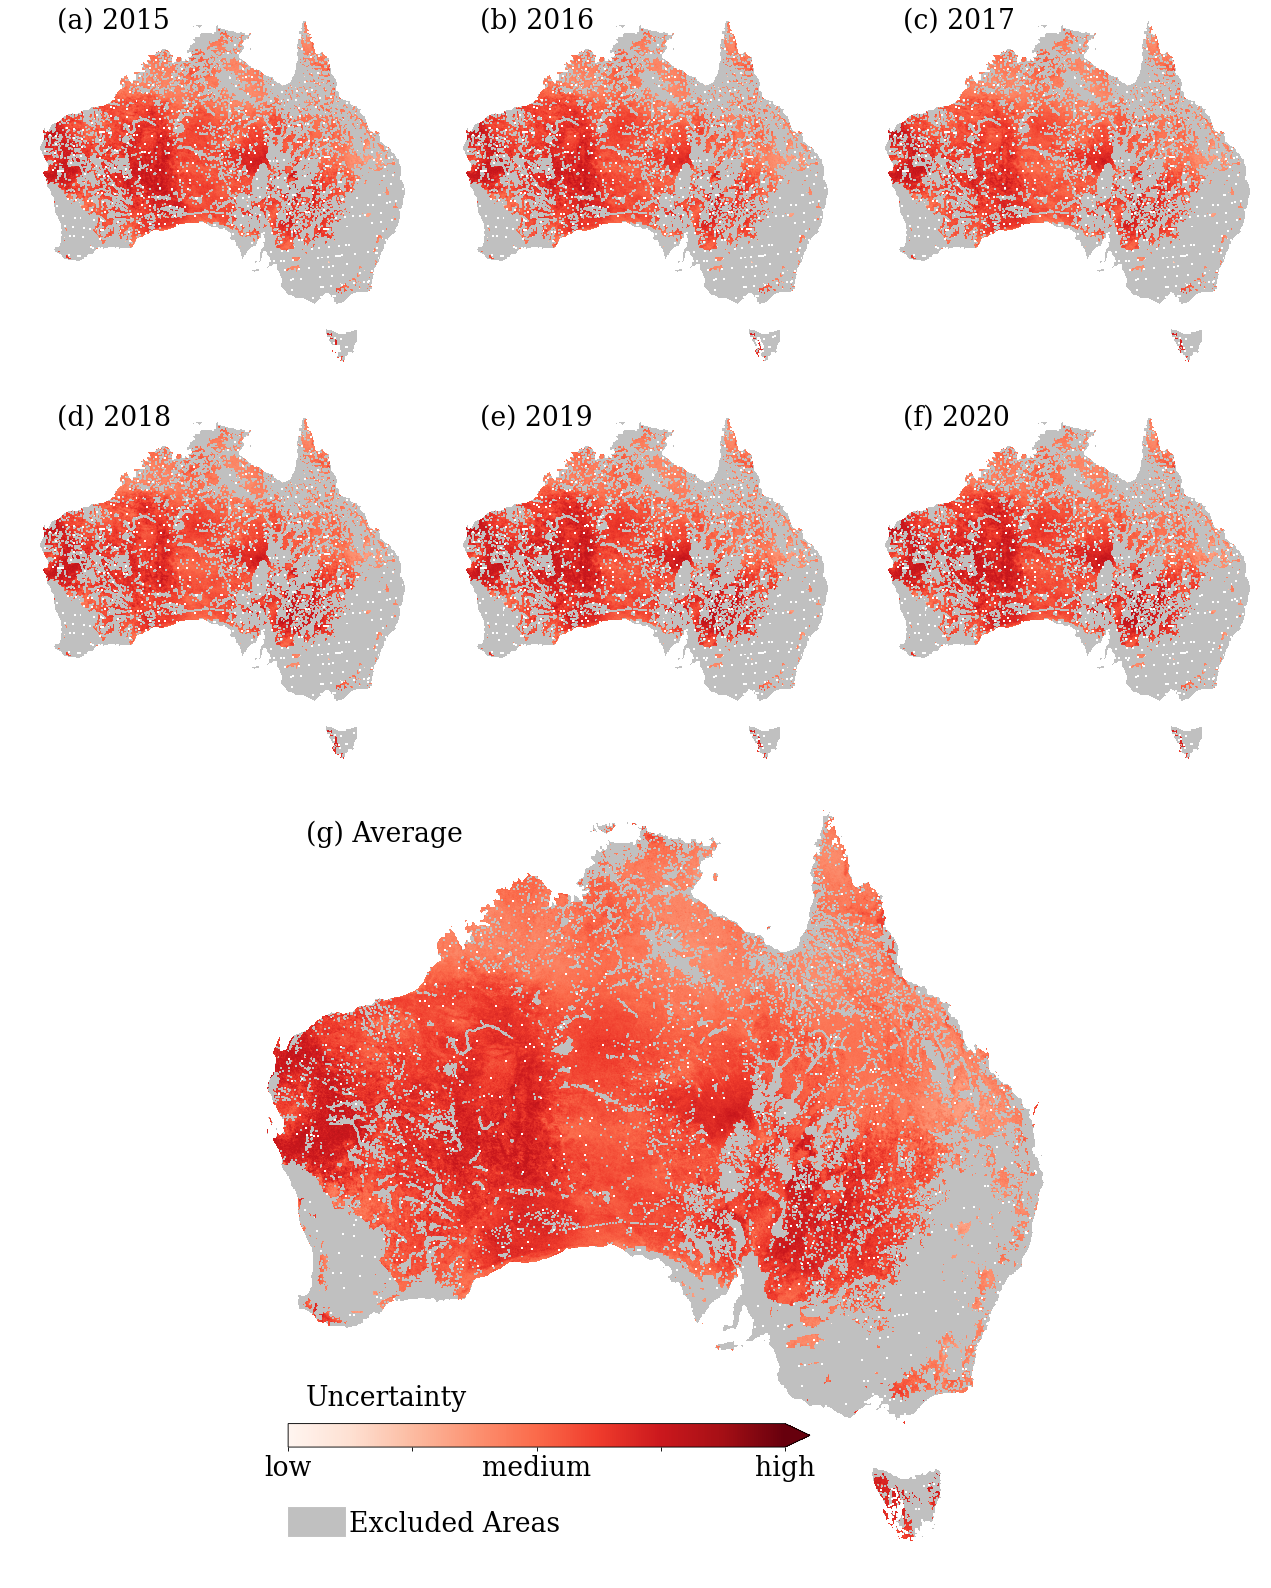

In [3]:
plt.rcParams["font.family"] = "DejaVu Serif"

cmap = plt.get_cmap('Reds')
cmap.set_under(color='silver', alpha=None)

fig = figure(figsize=(16, 20), dpi=80)

grid = plt.GridSpec(4, 3, wspace=0.4, hspace=0.1)

ax = plt.subplot(grid[0, 0])
plt.imshow(array['2015'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(a) 2015', fontsize=24)

ax = plt.subplot(grid[0, 1])
plt.imshow(array['2016'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(b) 2016', fontsize=24)

ax = plt.subplot(grid[0, 2])
plt.imshow(array['2017'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(c) 2017', fontsize=24)

ax = plt.subplot(grid[1, 0])
plt.imshow(array['2018'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(d) 2018', fontsize=24)

ax = plt.subplot(grid[1, 1])
plt.imshow(array['2019'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(e) 2019', fontsize=24)

ax = plt.subplot(grid[1, 2])
plt.imshow(array['2020'], cmap=cmap)
plt.box(False)
plt.axis('off')
plt.clim(0, 0.24)
t = plt.text(240, 80, '(f) 2020', fontsize=24)

ax = plt.subplot(grid[2:, :])
plt.imshow((array['2020'] + array['2019'] + array['2018'] + array['2017'] + array['2016'] + array['2015']) / 6, cmap=cmap)
plt.box(False)
plt.axis('off')
cb = plt.colorbar(cax=ax.inset_axes((0.1, 0.17, 0.60, 0.03)), orientation = 'horizontal', extend='max')
plt.clim(0, 0.24)
cb.set_ticks([0, 0.06, 0.12, 0.18, 0.24])
cb.set_ticklabels(['low', '', 'medium', '', 'high'])
t = plt.text(240, 100, '(g) Average', fontsize=24)
t = plt.text(208, 1680, '       ', fontsize=20)
t.set_bbox(dict(facecolor='silver', alpha=1, edgecolor='white'))
t = plt.text(340, 1690, 'Excluded Areas', fontsize=24)
plt.text(240, 1400, 'Uncertainty', fontsize=24)
cb.ax.tick_params(labelsize=24)

grid.tight_layout(fig)

plt.savefig('../figs/uncertainty_map.jpg', bbox_inches='tight', dpi=600)